**Problem Statement:**

  The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

#Evaluation Criteria (100 points)

    

    1. Importing the libraries & Reading the data file (10 points)
      

In [1]:
import pandas as pd
df=pd.read_csv('/content/sample_data/flipitnews-data.csv')
#df=df.head(30)
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [2]:
print('Shape of Dataset - ',df.shape)
print('Total No. of News Articles - ',df['Category'].nunique(),':',df['Category'].unique())
print('News Article per category - \n',df['Category'].value_counts())
print('Shape of Dataset - ',df.shape)
#print('\nInfo - \n',df.info)

Shape of Dataset -  (1836, 2)
Total No. of News Articles -  5 : ['Technology' 'Business' 'Sports' 'Entertainment' 'Politics']
News Article per category - 
 Category
Sports           421
Business         419
Politics         342
Entertainment    330
Technology       324
Name: count, dtype: int64
Shape of Dataset -  (1836, 2)


**Categorical to Numerical Encoding**
Now, we will map each of these categories to a number, so that our model can understand it in a better way and we will save this in a new column named ‘category_id’. Where each of the categories are represented in numerical.


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category_id']=le.fit_transform(df['Category'])
df.head()

,Category,Article,Category_id
0,Technology,tv future in the hands of viewers with home th...,4
1,Business,worldcom boss left books alone former worldc...,0
2,Sports,tigers wary of farrell gamble leicester say ...,3
3,Sports,yeading face newcastle in fa cup premiership s...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1


**Data Visualisation**

<Axes: xlabel='Category'>

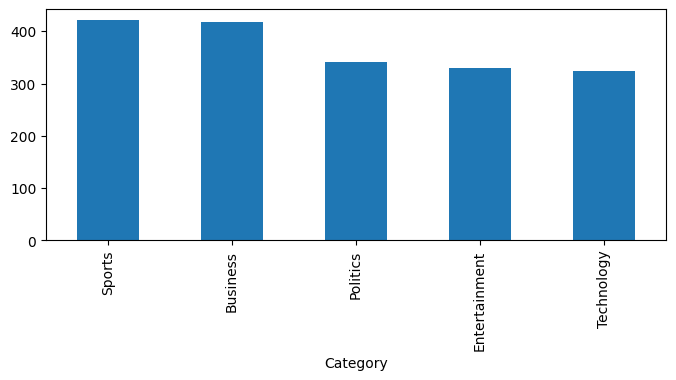

In [4]:
# @title Articles per Category
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
df['Category'].value_counts().plot(kind='bar')

      3. Processing the Textual Data i.e. the news articles (30 points)

          Removing the non-letters

          Tokenizing the text

          Removing stopwords

          Lemmatization

In [5]:
#*************************************Removing Stopwords *******************************
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#print(stopwords.words('english'))
def remove_stopwords(text):
  clean_text=' '.join([i for i in text.split() if i not in stopwords.words('english')])
  return clean_text

df['Article']=df['Article'].apply(lambda x:remove_stopwords(x))

#*************************************Removing Punctuations *******************************
import string

def remove_punctuation(text):
  cleantext=''.join([i for i in text if i not in string.punctuation])
  return cleantext

df['Article']=df['Article'].apply(lambda x:remove_punctuation(x))

#*************************************Lowering the Text *******************************
df['Article']=df['Article'].str.lower()

#*************************************Stemming *******************************
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stemming(text):
  clean_text=' '.join([ps.stem(i) for i in text.split()])
  return clean_text

df['Article']=df['Article'].apply(lambda x:stemming(x))

#*************************************Lemmatization *******************************
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
nltk.download('wordnet')
def Lemmatize(text):
  clean_text=' '.join([wl.lemmatize(i) for i in text.split()])
  return clean_text

df['Article']=df['Article'].apply(lambda x:Lemmatize(x))
df['Article']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0       tv futur hand viewer home theatr system plasma...
1       worldcom bos left book alon former worldcom bo...
2       tiger wari farrel gambl leicest say rush make ...
3       yead face newcastl fa cup premiership side new...
4       ocean twelv raid box offic ocean twelv crime c...
                              ...                        
1831    agassi fear melbourn andr agassi involv austra...
1832    worldcom exboss launch defenc lawyer defend fo...
1833    u give foreign firm extra time foreign firm gi...
1834    school sport back say pm toni blair promis spo...
1835    henman overcom rival rusedski tim henman save ...
Name: Article, Length: 1836, dtype: object

In [6]:
#*************************************Tokenization *******************************

import nltk
from nltk.tokenize import word_tokenize ,sent_tokenize
nltk.download('punkt')

word_cnt,unique_word_cnt=0,0

#Corpus of the entire Document
corpus=df['Article'].str.cat(sep=', ')
#print('corpus:',corpus)
print('Number of words in the entire corpus:',len(corpus))
#Find the letters used in Corpus
Unique_char=set(df['Article'].str.cat(sep=', '))
#print('Unique letters used in corpus:',Unique_char)

Vocabulary = df['Article'].str.cat(sep=', ')
print(set(word_tokenize(Vocabulary)))
for i in set(word_tokenize(Vocabulary)):
  unique_word_cnt+=1
print('Number of words in the vocabulary:',unique_word_cnt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of words in the entire corpus: 2569380
{'antenna', 'paris', 'larder', 'exot', 'gianni', 'laptop', 'sentenc', 'uklist', 'runin', 'clapton', 'feint', 'derbyfulham', 'choos', '2367', 'specul', 'niro', 'script', 'mogwai', 'browser', 'kidman', 'immacul', 'postman', 'demonis', 'anand', 'content', 'hackarmi', 'cook', 'footbal', '20001', 'totp', '258bn', 'ciara', 'softer', 'exe17', 'transatlant', 'beani', 'anger', 'woolf', 'godel', 'reclus', 'pleasur', 'optinrealbig', 'antiparti', 'discontinu', 'weak', 'gener', 'client', '27', 'bulk', '4gb', 'anounc', '849', 'option', 'hamstr', 'rosemead', '4862', 'flamboy', 'surprisngli', 'blackberri', 'mcname', 'unremark', 'crosshair', 'raynsford', 'slew', 'ri', 'nutter', 'simpsondaniel', 'wright', 'morpheu', 'vickeri', 'myrio', 'techi', 'general', 'partido', 'ingredi', 'dramat', 'lyco', '£127m', 'clump', '£132', 'recondit', 'doubt', 'firstclass', 'marpl', 'brittani', 'innovationl', 'sharma', 'node', 'in', 'chavez', 'intuit', 'on', 'poke', 'longrumour

**4. Encoding and Transforming the data (20 points)**

    Encoding the target variable

    Bag of Words

    TF-IDF

    Train-Test Split

In [7]:
# #*************************************One hot Encoding *******************************
# def get_one_hot_vectors():
#   import numpy as np

#   samples = df['Article']
#   # Create an empty dictionary
#   token_index = {}
#   #Create a counter for counting the number of key-value pairs in the token_length
#   counter = 0

#   # Select the elements of the samples which are the two sentences
#   for sample in samples:
#     for considered_word in sample.split():
#       if considered_word not in token_index:

#         # If the considered word is not present in the dictionary token_index, add it to the token_index
#         # The index of the word in the dictionary begins from 1
#         token_index.update({considered_word : counter + 1})

#         # updating the value of counter
#         counter = counter + 1
#   print(token_index)
#   # Set max_length to 6
#   max_length =max(samples.str.len())
#   # Create a tensor of dimension 3 named results whose every elements are initialized to 0
#   results  = np.zeros(shape = (len(samples),max_length,max(token_index.values())))
#   # Now create a one-hot vector corresponding to the word
#   # iterate over enumerate(samples) enumerate object
#   for i, sample in enumerate(samples):
#     #print(i,sample)
#   # Convert enumerate object to list and iterate over resultant list
#     for j, considered_word in list(enumerate(sample.split())):
#       #print(j,considered_word)

#       # set the value of index variable equal to the value of considered_word in token_index
#       index = token_index.get(considered_word)-1
#       #print('index',index)
#       # In the previous zero tensor: results, set the value of elements with their positional index as [i, j, index] = 1.
#       results[i, j, index] = 1.
#   #for j, considered_word in list(enumerate(sample.split())):
#   # print(j, considered_word)
#   print(samples)
#   print(results[0])

In [8]:
#*************************************Bag of Words *******************************
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(df['Article'])
print("\nVocabulary:")
print(cv.vocabulary_)

# Display the BOW matrix and vocabulary
print("Bag of Words Matrix:",bow.toarray().shape)
print(bow.toarray())
#print('Frequency of words',bow.toarray().sum(axis=0))
#print('words in vocabulary',cv.get_feature_names_out())


Vocabulary:
{'tv': 20267, 'futur': 8834, 'hand': 9656, 'viewer': 21015, 'home': 10163, 'theatr': 19657, 'system': 19359, 'plasma': 15447, 'highdefinit': 10010, 'digit': 6691, 'video': 21002, 'record': 16426, 'move': 13628, 'live': 12227, 'room': 17038, 'way': 21264, 'peopl': 15183, 'watch': 21240, 'radic': 16188, 'differ': 6682, 'five': 8367, 'year': 21834, 'time': 19829, 'accord': 2167, 'expert': 7909, 'panel': 14920, 'gather': 8955, 'annual': 2772, 'consum': 5713, 'electron': 7420, 'show': 17980, 'la': 11759, 'vega': 20902, 'discus': 6794, 'new': 14002, 'technolog': 19520, 'impact': 10541, 'one': 14497, 'favourit': 8125, 'pastim': 15043, 'lead': 11940, 'trend': 20119, 'programm': 15912, 'content': 5730, 'deliv': 6472, 'via': 20967, 'network': 13982, 'cabl': 4595, 'satellit': 17342, 'telecom': 19544, 'compani': 5549, 'broadband': 4345, 'servic': 17740, 'provid': 15976, 'front': 8751, 'portabl': 15605, 'devic': 6621, 'talkedabout': 19407, 'ce': 4909, 'person': 15235, 'dvr': 7210, 'pvr

In [9]:
  #*************************************TFIDF - Term Frequency/Inverse Document Frequency *******************************
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
#print(tfidf.idf_)
TFIDF=tfidf.fit_transform(df['Article'])
print("\nVocabulary:")
print(tfidf.vocabulary_)

# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())



Vocabulary:
{'tv': 20267, 'futur': 8834, 'hand': 9656, 'viewer': 21015, 'home': 10163, 'theatr': 19657, 'system': 19359, 'plasma': 15447, 'highdefinit': 10010, 'digit': 6691, 'video': 21002, 'record': 16426, 'move': 13628, 'live': 12227, 'room': 17038, 'way': 21264, 'peopl': 15183, 'watch': 21240, 'radic': 16188, 'differ': 6682, 'five': 8367, 'year': 21834, 'time': 19829, 'accord': 2167, 'expert': 7909, 'panel': 14920, 'gather': 8955, 'annual': 2772, 'consum': 5713, 'electron': 7420, 'show': 17980, 'la': 11759, 'vega': 20902, 'discus': 6794, 'new': 14002, 'technolog': 19520, 'impact': 10541, 'one': 14497, 'favourit': 8125, 'pastim': 15043, 'lead': 11940, 'trend': 20119, 'programm': 15912, 'content': 5730, 'deliv': 6472, 'via': 20967, 'network': 13982, 'cabl': 4595, 'satellit': 17342, 'telecom': 19544, 'compani': 5549, 'broadband': 4345, 'servic': 17740, 'provid': 15976, 'front': 8751, 'portabl': 15605, 'devic': 6621, 'talkedabout': 19407, 'ce': 4909, 'person': 15235, 'dvr': 7210, 'pvr

In [10]:
#*************************************Train-test split *******************************
X=df['Article']
#X=tfidf.fit_transform(df['Article'])
y=df['Category_id']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1468,), (368,), (1468,), (368,))

Enable the line no. with Ctrl+shift+M

    Line 7: Iterate the corpus
    Line 9: Set the ith word as the target word
    Line 14,21,27 : Condition to check if the ith word in line 9 is the (first :Best) , (middle : way) or the (last : persistence) word .
    Line 17 : If it is the first word, get the next 2 (window_size =2) words and set them as context words
    Line 21 : If it is the last word, get the previous 2 (window_size =2) words and set them as context words
    Line 30,37 : If our ith word is a middle word, then we need to get 2 (window_size =2) words before the ith word and 2 (window_size =2 ) words after the ith word and set all 4 as the context words. If there is only 1 word before or after the ith word, we get only 1 word.

In [11]:
def conf_matrix(y_test, y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  conf_mat = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_mat, annot=True, xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique(), cmap="YlGnBu", fmt='g')


#Exploring Multi-classification Models(classification models)

**5. Model Training & Evaluation (30 points)**

    Simple Approach - Naive Bayes

    Functionalized Code (Optional)- Decision Tree,Nearest Neighbors,RandomForest

**1. Naive Bayes - MultinomialNB**

(1468,) (368,) (1468,) (368,)
accuracy 0.967391304347826
['Sports']
['Technology']
               precision    recall  f1-score   support

     Business       0.92      0.99      0.95        83
Entertainment       0.98      0.95      0.97        65
     Politics       0.98      0.94      0.96        66
       Sports       0.99      1.00      0.99        84
   Technology       0.97      0.94      0.96        70

     accuracy                           0.97       368
    macro avg       0.97      0.96      0.97       368
 weighted avg       0.97      0.97      0.97       368



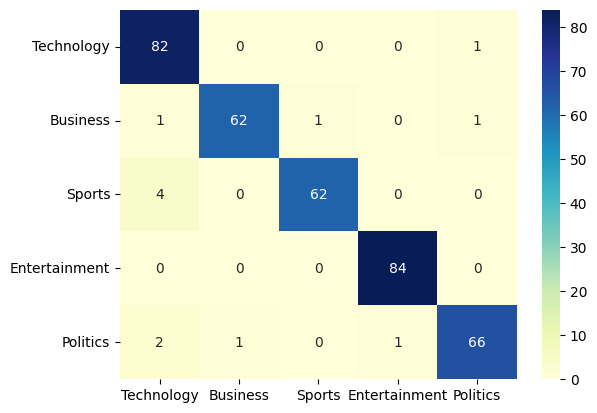

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df['Article']
y = df['Category']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
complaint = "games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by christmas."
print(nb.predict([complaint]))
complaint = "tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices. one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes like the us s tivo and the uk s sky+ system allow people to record store play pause and forward wind tv programmes when they want. essentially the technology allows for much more personalised tv. they are also being built-in to high-definition tv sets which are big business in japan and the us but slower to take off in europe because of the lack of high-definition programming. not only can people forward wind through adverts they can also forget about abiding by network and channel schedules putting together their own a-la-carte entertainment. but some us networks and cable and satellite companies are worried about what it means for them in terms of advertising revenues as well as brand identity and viewer loyalty to channels. although the us leads in this technology at the moment it is also a concern that is being raised in europe particularly with the growing uptake of services like sky+. what happens here today we will see in nine months to a years time in the uk adam hume the bbc broadcast s futurologist told the bbc news website. for the likes of the bbc there are no issues of lost advertising revenue yet. it is a more pressing issue at the moment for commercial uk broadcasters but brand loyalty is important for everyone. we will be talking more about content brands rather than network brands said tim hanlon from brand communications firm starcom mediavest. the reality is that with broadband connections anybody can be the producer of content. he added: the challenge now is that it is hard to promote a programme with so much choice. what this means said stacey jolna senior vice president of tv guide tv group is that the way people find the content they want to watch has to be simplified for tv viewers. it means that networks in us terms or channels could take a leaf out of google s book and be the search engine of the future instead of the scheduler to help people find what they want to watch. this kind of channel model might work for the younger ipod generation which is used to taking control of their gadgets and what they play on them. but it might not suit everyone the panel recognised. older generations are more comfortable with familiar schedules and channel brands because they know what they are getting. they perhaps do not want so much of the choice put into their hands mr hanlon suggested. on the other end you have the kids just out of diapers who are pushing buttons already - everything is possible and available to them said mr hanlon. ultimately the consumer will tell the market they want. of the 50 000 new gadgets and technologies being showcased at ces many of them are about enhancing the tv-watching experience. high-definition tv sets are everywhere and many new models of lcd (liquid crystal display) tvs have been launched with dvr capability built into them instead of being external boxes. one such example launched at the show is humax s 26-inch lcd tv with an 80-hour tivo dvr and dvd recorder. one of the us s biggest satellite tv companies directtv has even launched its own branded dvr at the show with 100-hours of recording capability instant replay and a search function. the set can pause and rewind tv for up to 90 hours. and microsoft chief bill gates announced in his pre-show keynote speech a partnership with tivo called tivotogo which means people can play recorded programmes on windows pcs and mobile devices. all these reflect the increasing trend of freeing up multimedia so that people can watch what they want when they want."
print(nb.predict([complaint]))

print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

  **2. SGDClassifier**

    Linear Support Vector Machine is widely regarded as one of the best text
    classification algorithms.

accuracy 0.970108695652174
               precision    recall  f1-score   support

     Business       0.94      0.98      0.96        83
Entertainment       0.96      0.98      0.97        65
     Politics       1.00      0.94      0.97        66
       Sports       0.98      1.00      0.99        84
   Technology       0.99      0.94      0.96        70

     accuracy                           0.97       368
    macro avg       0.97      0.97      0.97       368
 weighted avg       0.97      0.97      0.97       368



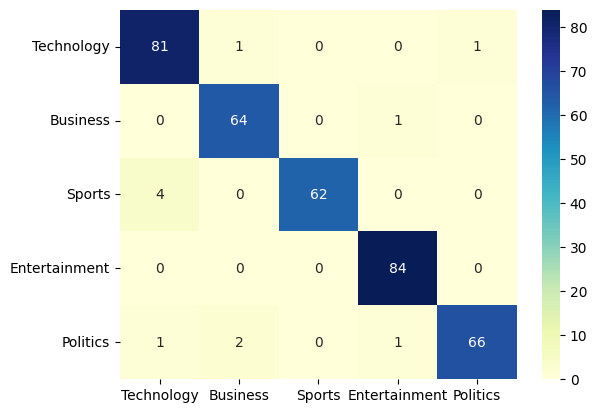

In [13]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

**Logistic Regression**
    
    Simple and easy to understand classification algorithm, and Logistic regression can be easily generalized to multiple classes.

accuracy 0.9728260869565217
               precision    recall  f1-score   support

     Business       0.94      0.98      0.96        83
Entertainment       0.96      1.00      0.98        65
     Politics       1.00      0.94      0.97        66
       Sports       0.99      1.00      0.99        84
   Technology       0.99      0.94      0.96        70

     accuracy                           0.97       368
    macro avg       0.97      0.97      0.97       368
 weighted avg       0.97      0.97      0.97       368



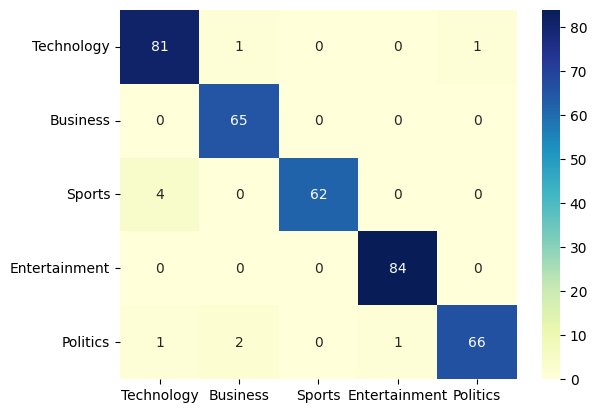

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
conf_matrix(y_test, y_pred)

In [15]:
complaint = "games maker fights for survival one of britain s largest independent game makers  argonaut games  has been put up for sale.  the london-based company behind the harry potter games has sacked about 100 employees due to a severe cash crisis. the administrators told bbc news online that selling argonaut was the only way to save it as it had run out of cash. argonaut warned that it was low on cash 10 days ago when its shares were suspended from trading on the london stock exchange.  argonaut has been making games for some 18 years and is one the largest independent games developers in the uk.  along with its headquarters in north london  it operates studios in cambridge and sheffield. argonaut was behind the harry potter games which provided a healthy flow of cash into the company. but  like all software developers  argonaut needed a constant flow of deals with publishers. signs that it was in trouble emerged in august  when it warned it was heading for losses of £6m in the financial year due to delays in signing new contracts for games. those new deals were further delayed  leading argonaut to warn in mid-october that it was running out of cash and suspend trading of its shares on the london stock exchange. as part of cost-cutting measures  some 100 employees were fired.  when the news about the £6m loss came out  we knew there were going to be redundancies   said jason parkinson  one of the game developers sacked by argonaut.  a lot of people suspected that argonaut had been in trouble for some time   he told bbc news online. mr parkinson said staff were told the job losses were necessary to save argonaut from going under. at the start of the year  the company employed 268 people. after the latest round of cuts there are 80 staff at argonaut headquarters in edgware in north london  with 17 at its morpheme offices in kentish town  london  and 22 at the just add monsters base in cambridge.  argonaut called in administrators david rubin & partners on friday to find a way to rescue the company from collapse. it spent the weekend going over the company s finances and concluded that the only way to save the business was to put it up for sale. the administrator told bbc news online that the costs of restructuing would be too high  partly because of the overheads from the company s four premises across the uk. it said it was hopeful that it could save some 110 jobs by selling the business  saying it had had expressions of interest from several quarters and were looking for a quick sale. the administrator said it would ensure that staff made redundant would receive any wages  redundancy or holiday pay due to them  hopefully by christmas."

print(logreg.predict([complaint]))


['Technology']


In [16]:
df[['Category','Category_id']].drop_duplicates()

,Category,Category_id
0,Technology,4
1,Business,0
2,Sports,3
4,Entertainment,1
5,Politics,2


#Using the same data set, we are going to try some advanced techniques such as word embedding and neural networks. Now, let’s try some complex features than just simply counting words.



**Decision Tree**
    
    Most powerful tools of supervised learning algorithms used for both classification and regression tasks.
    DecisionTreeClassifier is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

accuracy 0.8260869565217391
               precision    recall  f1-score   support

   Technology       0.77      0.91      0.83        88
     Business       0.85      0.78      0.81        72
       Sports       0.74      0.69      0.71        51
Entertainment       0.93      0.90      0.92        90
     Politics       0.81      0.78      0.79        67

    micro avg       0.83      0.83      0.83       368
    macro avg       0.82      0.81      0.81       368
 weighted avg       0.83      0.83      0.83       368
  samples avg       0.83      0.83      0.83       368



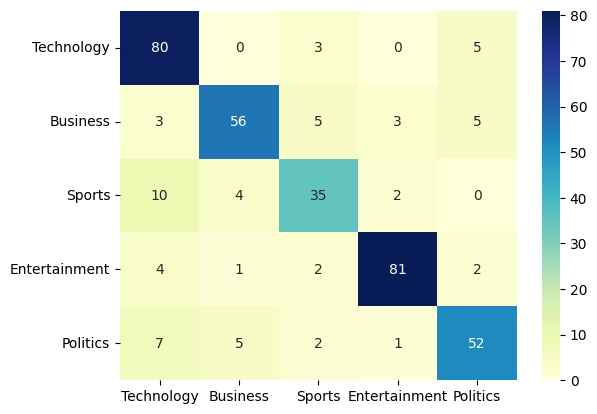

In [17]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

In [18]:
#plot_tree(model,filled=True,max_depth=2)

accuracy 0.7934782608695652
               precision    recall  f1-score   support

   Technology       1.00      0.83      0.91        81
     Business       1.00      0.76      0.87        68
       Sports       1.00      0.68      0.81        75
Entertainment       1.00      0.98      0.99        83
     Politics       1.00      0.67      0.80        61

    micro avg       1.00      0.79      0.88       368
    macro avg       1.00      0.78      0.87       368
 weighted avg       1.00      0.79      0.88       368
  samples avg       0.79      0.79      0.79       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


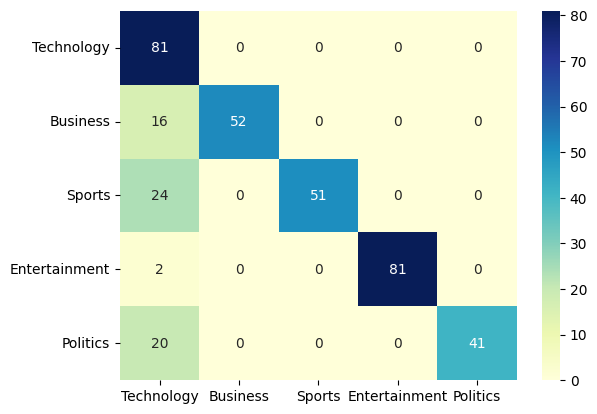

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

RFC=RandomForestClassifier(random_state=7,criterion='gini')
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)


print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

accuracy 0.5543478260869565
               precision    recall  f1-score   support

   Technology       0.89      0.36      0.52        85
     Business       0.89      0.35      0.50        69
       Sports       0.95      0.55      0.70        74
Entertainment       0.37      1.00      0.54        82
     Politics       1.00      0.45      0.62        58

    micro avg       0.58      0.55      0.57       368
    macro avg       0.82      0.54      0.58       368
 weighted avg       0.80      0.55      0.57       368
  samples avg       0.55      0.55      0.55       368



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


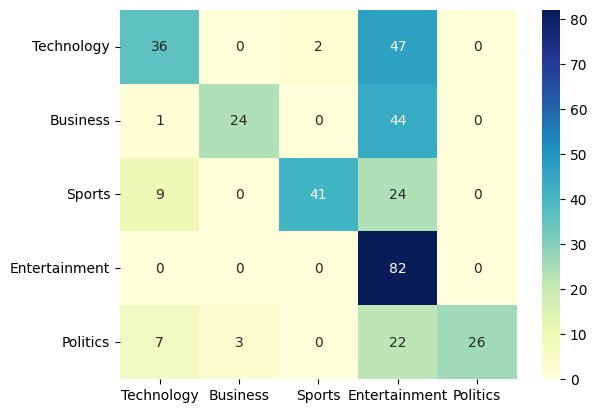

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

X=cv.fit_transform(df['Article']).toarray()
y=cv.fit_transform(df['Category']).toarray()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))
conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,X.shape,y.shape


((1468, 21983), (368, 21983), (1468, 5), (368, 5), (1836, 21983), (1836, 5))

In [22]:
df['Category'].unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

#Best Accuracy came with Logistic Regression so far > 95%.

#Use Pre-trained Vectors - Word2Vec

In [23]:
import gensim
#from gensim.models import word2vec
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [24]:
wv=api.load('fasttext-wiki-news-subwords-300')
#wv.save('path')

[==================================================] 100.0% 958.5/958.4MB downloaded


[[-0.20188966 -0.168247  ]
 [-0.5583138  -0.50207645]
 [ 0.5685122  -0.10687272]
 [ 0.53361326  0.01395208]
 [-0.34192201  0.7632442 ]]


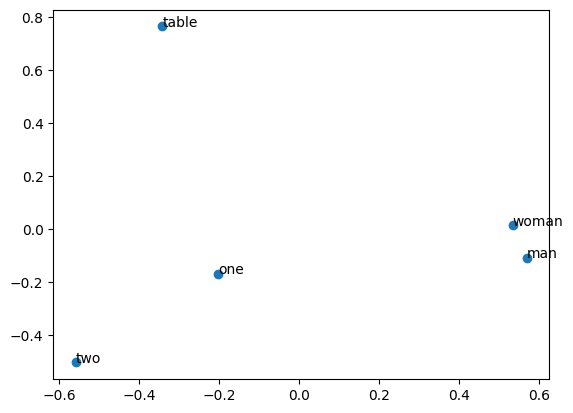

In [25]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words=['one','two','man','woman','table']
sample_vectors=np.array([wv[word] for word in words])
pca=PCA(n_components=2)
result=pca.fit_transform(sample_vectors)
print(result)
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
  plt.annotate(word,xy=(result[i,0],result[i,1]))

In [26]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res


# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    #print(doc,type(doc))
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [27]:
sent_vec("I am happy")
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
#print(stop_words)

import string
punctuations = string.punctuation
print(punctuations)
df['tokens'] = df['Article'].apply(spacy_tokenizer)
df['vectorized_Article'] = df['tokens'].apply(sent_vec)

df.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Category,Article,Category_id,tokens,vectorized_Article
0,Technology,tv futur hand viewer home theatr system plasma...,4,"[tv, futur, hand, viewer, home, theatr, system...","[-0.004332342388307534, -0.02740170552720182, ..."
1,Business,worldcom bos left book alon former worldcom bo...,0,"[worldcom, bos, leave, book, alon, worldcom, b...","[0.004095679312196421, -0.013183831525086535, ..."
2,Sports,tiger wari farrel gambl leicest say rush make ...,3,"[tiger, wari, farrel, gambl, leicest, rush, bi...","[0.012030211369274185, -0.023460262798083324, ..."
3,Sports,yead face newcastl fa cup premiership side new...,3,"[yead, face, newcastl, fa, cup, premiership, n...","[0.020343144924430748, -0.024536721092848993, ..."
4,Entertainment,ocean twelv raid box offic ocean twelv crime c...,1,"[ocean, twelv, raid, box, offic, ocean, twelv,...","[0.0004408440483404837, -0.004964837807648141,..."


accuracy 0.8804347826086957
               precision    recall  f1-score   support

     Business       0.80      0.95      0.87        84
Entertainment       0.95      0.82      0.88        66
     Politics       0.90      0.78      0.84        69
       Sports       0.88      0.99      0.93        84
   Technology       0.93      0.82      0.87        65

     accuracy                           0.88       368
    macro avg       0.89      0.87      0.88       368
 weighted avg       0.89      0.88      0.88       368



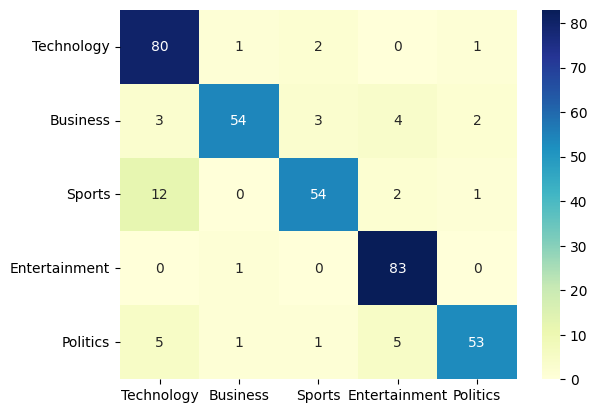

In [28]:
X = df['vectorized_Article'].to_list()
y = df['Category'].to_list()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
LogisticRegression()
from sklearn import metrics
predicted = classifier.predict(X_test)
print('accuracy %s' % accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
conf_matrix(y_test, predicted)

In [29]:
complaint = "ocean s twelve raids box office ocean s twelve  the crime caper sequel starring george clooney  brad pitt and julia roberts  has gone straight to number one in the us box office chart.  it took $40.8m (£21m) in weekend ticket sales  according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one  national treasure  into third place. wesley snipes  blade: trinity was in second  taking $16.1m (£8.4m). rounding out the top five was animated fable the polar express  starring tom hanks  and festive comedy christmas with the kranks.  ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us  after the three films in the lord of the rings trilogy. the sequel narrowly beat its 2001 predecessor  ocean s eleven which took $38.1m (£19.8m) on its opening weekend and $184m (£95.8m) in total. a remake of the 1960s film  starring frank sinatra and the rat pack  ocean s eleven was directed by oscar-winning director steven soderbergh. soderbergh returns to direct the hit sequel which reunites clooney  pitt and roberts with matt damon  andy garcia and elliott gould. catherine zeta-jones joins the all-star cast.  it s just a fun  good holiday movie   said dan fellman  president of distribution at warner bros. however  us critics were less complimentary about the $110m (£57.2m) project  with the los angeles times labelling it a  dispiriting vanity project . a milder review in the new york times dubbed the sequel  unabashedly trivial ."
complaint_token = spacy_tokenizer(complaint)
#complaint_token

X_pred=sent_vec(complaint_token).reshape(1,-1)
#X_pred

classifier.predict(X_pred)

array(['Entertainment'], dtype='<U13')